# Salary Prediction Soccer

In [18]:
!kaggle kernels push -p "C:/Users/hp/OneDrive/Content/Blog/sport-analytics/Github/kaggle/out"

Kernel version 17 successfully pushed.  Please check progress at https://www.kaggle.com/agewerc/salarysoccerprediction


#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Import Data

In [3]:
soccer_data = pd.read_csv('../input/fifa-20-complete-player-dataset/players_20.csv') 

In [4]:
soccer_data.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,6/24/1987,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,2/5/1985,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,2/5/1992,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1/7/1993,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1/7/1991,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


#### Filter English Teams

In [5]:
EPL_list = ['Arsenal', 'Aston Villa', 'Bournemouth', 'Brighton & Hove Albion', 
            'Burnley', 'Chelsea', 'Crystal Palace','Everton', 'Leicester City', 
            'Liverpool', 'Manchester City', 'Manchester United', 'Newcastle United', 
            'Norwich City', 'Sheffield United', 'Southampton', 'Tottenham Hotspur', 
            'Watford', 'West Ham United', 'Wolverhampton Wanderers']

In [6]:
soccer_data['new'] = soccer_data['club'].apply(lambda x: 1 if x in EPL_list else 0)
EPL_data = soccer_data[soccer_data['new'] == 1]

#### Filter Data

In [7]:
EPL_data = EPL_data.dropna(axis='columns') # remove NA's
EPL_data = EPL_data[EPL_data['player_positions'] != 'GK'] # remove Goalkeepers
EPL_data = EPL_data.loc[:,~EPL_data.columns.str.contains('^goalkeeping', case=False)] # remove Goalkeepers skills 
EPL_data = EPL_data._get_numeric_data() # remove non-numerical data
EPL_data= EPL_data.drop(columns=['sofifa_id', 'new', 'value_eur', 'team_jersey_number','contract_valid_until', 'overall', 'potential'])

#### Data Exploration

In [8]:
EPL_data.columns

Index(['age', 'height_cm', 'weight_kg', 'wage_eur', 'international_reputation',
       'weak_foot', 'skill_moves', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle'],
      dtype='object')

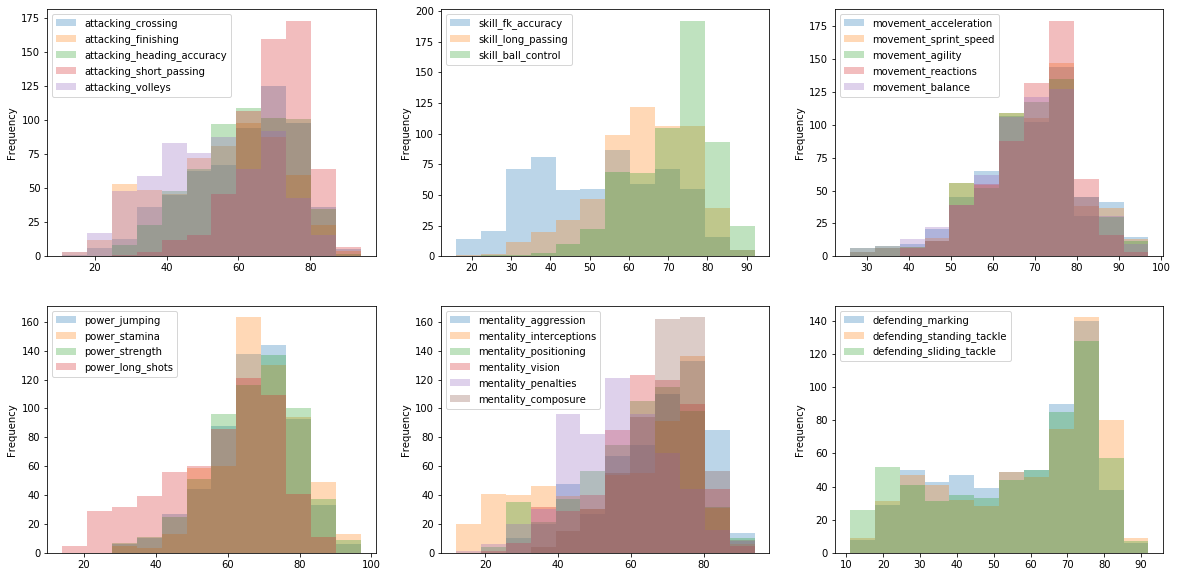

In [9]:
from matplotlib.pyplot import figure

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
# fig, ax = plt.subplots()

EPL_data.loc[:, ['attacking_crossing', 'attacking_finishing', 
                 'attacking_heading_accuracy', 'attacking_short_passing',
                 'attacking_volleys']].plot.hist(bins=12, alpha=0.3, ax=axes[0,0])

EPL_data.loc[:, ['skill_fk_accuracy', 'skill_long_passing', 
                 'skill_ball_control']].plot.hist(bins=12, alpha=0.3, ax=axes[0,1])

EPL_data.loc[:, ['movement_acceleration', 'movement_sprint_speed', 
                 'movement_agility', 'movement_reactions', 
                 'movement_balance']].plot.hist(bins=12, alpha=0.3, ax=axes[0,2])

EPL_data.loc[:, ['power_jumping', 'power_stamina', 'power_strength',
                 'power_long_shots']].plot.hist(bins=12, alpha=0.3, ax=axes[1,0])

EPL_data.loc[:, ['mentality_aggression', 'mentality_interceptions',
                 'mentality_positioning', 'mentality_vision', 'mentality_penalties',
                 'mentality_composure']].plot.hist(bins=12, alpha=0.3, ax=axes[1,1])

EPL_data.loc[:, ['defending_marking', 'defending_standing_tackle',
                 'defending_sliding_tackle']].plot.hist(bins=12, alpha=0.3, ax=axes[1,2])

#### Machine Learning

In [10]:
EPL_data

,age,height_cm,weight_kg,wage_eur,international_reputation,weak_foot,skill_moves,attacking_crossing,attacking_finishing,attacking_heading_accuracy,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
5,28,181,70,370000,4,5,4,93,82,55,...,90,76,61,88,94,79,91,68,58,51
7,27,193,92,200000,3,3,2,53,52,86,...,64,82,89,47,65,62,89,91,92,85
9,27,175,71,240000,3,3,4,79,90,59,...,84,63,55,92,84,77,91,38,43,41
12,25,188,89,220000,3,4,3,75,94,86,...,86,78,35,93,81,90,91,56,36,38
15,28,168,72,235000,3,3,2,68,65,54,...,63,90,92,72,79,54,85,90,91,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17446,20,175,65,5000,1,3,2,42,33,47,...,38,53,48,36,53,41,49,49,54,55
17585,18,180,70,3000,1,3,2,42,36,39,...,31,41,29,46,55,45,62,36,48,51
17645,20,176,68,5000,1,3,3,46,49,40,...,37,30,21,48,47,55,48,20,25,22
17852,19,180,70,4000,1,3,2,43,28,51,...,33,57,38,55,49,46,46,44,41,52


In [11]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
labels = np.log(EPL_data['wage_eur'])
# Remove the labels from the features
# axis 1 refers to the columns
features= EPL_data.drop('wage_eur', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [12]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [13]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 0)
# Train the model on training data
rf.fit(train_features, train_labels);

In [14]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.23 degrees.


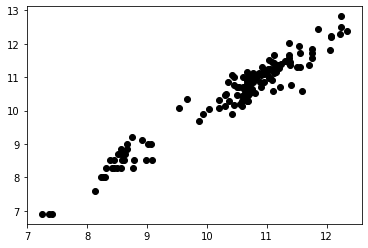

In [15]:
import matplotlib.pyplot as plt
plt.plot(predictions, test_labels, 'o', color='black');